# Comparing datasets

In [2]:
import polars as pl
import matplotlib.pyplot as plt

In [ ]:
ROOT_DATA_DIR = "../data/"

czi_df = pl.read_parquet(ROOT_DATA_DIR + "CZI/processed-CZI-dataset.parquet")
kg_pmc_df = pl.read_parquet(ROOT_DATA_DIR + "software-kg-pmc/processed-pmc-kg-dataset.parquet")


## Standardising the processed datasets

In [4]:
czi_df.describe()

statistic,article_doi,software_id_CZI,software_rrid,software_name,software_url,context,article_pmcid
str,str,str,str,str,f64,str,f64
"""count""","""16056698""","""16158993""","""4223665""","""16153163""",9.46531e6,"""16158993""",1.6158993e7
"""null_count""","""102295""","""0""","""11935328""","""5830""",6.693683e6,"""0""",0.0
"""mean""",null,null,null,null,null,null,5.9125e6
"""std""",null,null,null,null,null,null,1.7347e6
"""min""",""" 10.1186/1477-5956-10-26""","""SM0""","""SCR_000004""",""" MGA""",null,""" # 198 genes mapped to this te…",176545.0
"""25%""",null,null,null,null,null,null,4.540975e6
"""50%""",null,null,null,null,null,null,6.126143e6
"""75%""",null,null,null,null,null,null,7.415876e6
"""max""","""10.9745/GHSP-D-21-00144""","""SM999999""","""SCR_021924""","""鼠源及人源化BCMA CAR-T的转染效率""",null,"""𝜀c regressions and comparisons…",8.51084e6


In [5]:
kg_pmc_df.describe()

statistic,article_id,software_id,top_software_name,all_software_names,software_url,mention_types
str,str,f64,str,str,str,str
"""count""","""7466923""",7.466923e6,"""7466923""","""7466923""","""550716""","""7466923"""
"""null_count""","""0""",0.0,"""0""","""0""","""6916207""","""0"""
"""mean""",null,1.4902e6,null,null,null,null
"""std""",null,141624.705752,null,null,null,null
"""min""","""Eur_J_Neurosci_2015_Nov_6_42(1…",25.0,"""!""","""!""","""""","""Creation"""
"""25%""",null,1.476301e6,null,null,null,null
"""50%""",null,1.482531e6,null,null,null,null
"""75%""",null,1.513869e6,null,null,null,null
"""max""","""PMC99051""",1.778958e6,"""⋆""","""⋆""","""∼/pyneal/pyneal_scanner""","""Usage; Mention; Deposition; Cr…"


### Standardising naming and type

> **TODO:** check if the KG PMC software ID is mention id or dataset specific software id - perhaps rename to something more general than software_id_<dataset> since in the CZI dataset I belive it is actually the mention ID rather than their "local" software id

In [ ]:
kg_pmc_df = (
    kg_pmc_df.rename(
        {"article_id": "article_pmcid", # Updating to reflect what type of ID it is, to match CZI
         "software_id": "software_id_kg_pmc" # Updating to reflect that it is the dataset specific id 
         
    })
)

czi_df = (
    czi_df.rename(
        {"software_name": "top_software_name", # Update to match format of the KG-PMC dataset
         "software_id_CZI": "software_id_czi"
    })
)

czi_df = czi_df.with_columns( 
    ("PMC" + pl.col("article_pmcid").cast(pl.Utf8)).alias("article_pmcid") # Update CZI dataset to have pmcid on the format "PMCxxxxxxx" like somisci
)

### Standardising order

In [7]:
stand_czi_df = czi_df.select([
    "article_pmcid",
    "software_id_czi",
    "top_software_name",
    "software_url",

    # Unique to this dataset
    "context",
    "article_doi",
    "software_rrid",

])

stand_kg_pmc_df = kg_pmc_df.select([
    "article_pmcid",
    "software_id_kg_pmc",
    "top_software_name",
    "software_url",

    # Unique to this dataset
    "all_software_names",
    "mention_types"
])

In [8]:
stand_kg_pmc_df.describe()[0]

statistic,article_pmcid,software_id_kg_pmc,top_software_name,software_url,all_software_names,mention_types
str,str,f64,str,str,str,str
"""count""","""7466923""",7.466923e6,"""7466923""","""550716""","""7466923""","""7466923"""


In [9]:
stand_czi_df.describe()[0]

statistic,article_pmcid,software_id_czi,top_software_name,software_url,context,article_doi,software_rrid
str,str,str,str,f64,str,str,str
"""count""","""16158993""","""16158993""","""16153163""",9.46531e6,"""16158993""","""16056698""","""4223665"""


In [10]:
stand_czi_df

article_pmcid,software_id_czi,top_software_name,software_url,context,article_doi,software_rrid
str,str,str,list[str],str,str,str
"""PMC8475362""","""SM0""","""Olympus CellSens""",null,"""Then, all items were photograp…","""10.1186/s43591-021-00017-9""",null
"""PMC8475362""","""SM1""","""OPUS""",null,"""Spectra were then vector norma…","""10.1186/s43591-021-00017-9""",null
"""PMC8475362""","""SM2""","""R package DHARMa""",null,"""Model fit was assessed through…","""10.1186/s43591-021-00017-9""",null
"""PMC8475362""","""SM3""","""R""","[null, null, … ""https://github.com/ncornwell/R""]","""Analyses and plotting were per…","""10.1186/s43591-021-00017-9""",null
"""PMC8475362""","""SM3""","""R""","[null, null, … ""https://github.com/dmpe/R""]","""Analyses and plotting were per…","""10.1186/s43591-021-00017-9""",null
…,…,…,…,…,…,…
"""PMC6683272""","""SM53566""","""MetaVision""",null,"""All data were obtained by revi…","""10.3390/nu11071443""",null
"""PMC6683272""","""SM4442""",null,null,"""All data were obtained by revi…","""10.3390/nu11071443""",null
"""PMC6683272""","""SM53019""","""iMDsoft""",null,"""All data were obtained by revi…","""10.3390/nu11071443""",null


## Comparing the processed datasets

Sanity check to see if the PMC addition to article_pmcid in the CZI dataset worked

In [ ]:
czi_unique = stand_czi_df.select("article_pmcid").unique().height
pmc_unique = stand_kg_pmc_df.select("article_pmcid").unique().height

common_pmcids = (
    stand_czi_df.select("article_pmcid").unique()
    .join(
        stand_kg_pmc_df.select("article_pmcid").unique(),
        on="article_pmcid",
        how="inner"
    )
)

print(f"CZI unique: {czi_unique:,}")
print(f"PMC unique: {pmc_unique:,}")
print(f"Common PMCIDs: {common_pmcids.height:,}")

CZI unique: 1,697,560
PMC unique: 1,910,273
Common PMCIDs: 1,316,205


Group by paper (PMCID) to get unique software lists. 
> Are the software names the best to use for this?

In [12]:
czi_grouped = (
    stand_czi_df.group_by("article_pmcid")
    .agg(pl.col("top_software_name").unique().alias("czi_software_list"))
)

pmc_grouped = (
    stand_kg_pmc_df.group_by("article_pmcid")
    .agg(pl.col("top_software_name").unique().alias("pmc_software_list"))
)

### Comparing software counts per paper

Looking at the count of softwares per article for the two datasets

In [13]:
czi_grouped = czi_grouped.with_columns(
    pl.col("czi_software_list").list.len().cast(pl.Int64).alias("czi_software_count")
)

pmc_grouped = pmc_grouped.with_columns(
    pl.col("pmc_software_list").list.len().cast(pl.Int64).alias("pmc_software_count")
)

count_comparison = (
    czi_grouped
    .join(pmc_grouped, on="article_pmcid", how="inner")
    .with_columns([
        (pl.col("czi_software_count").fill_null(0) -
         pl.col("pmc_software_count").fill_null(0)
        ).alias("count_difference")
    ])
)


In [14]:
count_comparison.describe()

statistic,article_pmcid,czi_software_list,czi_software_count,pmc_software_list,pmc_software_count,count_difference
str,str,f64,f64,f64,f64,f64
"""count""","""1316205""",1.316205e6,1.316205e6,1.316205e6,1.316205e6,1.316205e6
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,4.559104,null,4.1876,0.371504
"""std""",null,null,5.065949,null,4.797891,1.844558
"""min""","""PMC1043860""",null,1.0,null,1.0,-58.0
"""25%""",null,null,2.0,null,1.0,0.0
"""50%""",null,null,3.0,null,3.0,0.0
"""75%""",null,null,6.0,null,5.0,1.0
"""max""","""PMC7814635""",null,236.0,null,225.0,190.0


/var/folders/jf/2v02ryz57kgb880gsw0d304h0000gn/T/ipykernel_47674/3999931766.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


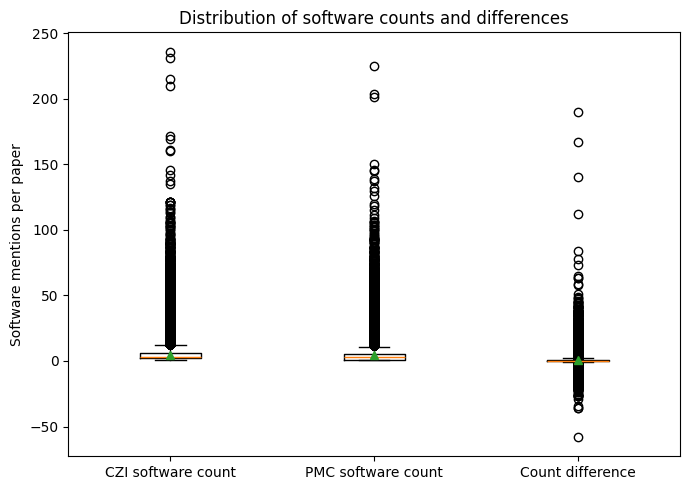

In [15]:
plt.figure(figsize=(7, 5))
plt.boxplot(
    [
        count_comparison["czi_software_count"].to_list(),
        count_comparison["pmc_software_count"].to_list(),
        count_comparison["count_difference"].to_list()
    ],
    labels=["CZI software count", "PMC software count", "Count difference"],
    showmeans=True
)
plt.ylabel("Software mentions per paper")
plt.title("Distribution of software counts and differences")
plt.tight_layout()
plt.show()


In [16]:
same_count = count_comparison.filter(pl.col("count_difference") == 0).height
czi_more = count_comparison.filter(pl.col("count_difference") > 0).height
pmc_more = count_comparison.filter(pl.col("count_difference") < 0).height
max_diff = count_comparison.select(pl.col("count_difference").abs().max()).item()
avg_diff = count_comparison.select(pl.col("count_difference").mean()).item()
avg_abs_diff = (
    count_comparison
    .select(pl.col("count_difference").abs().mean())
    .item()
)

print(f"Papers with same counts: {same_count:,}")
print(f"Papers where CZI > PMC: {czi_more:,}")
print(f"Papers where PMC > CZI: {pmc_more:,}")
print(f"Maximum absolute difference: {max_diff}")
print(f"Average signed difference (CZI - PMC): {avg_diff:.2f}")
print(f"Average absolute difference: {avg_abs_diff:.2f}")


if avg_diff > 0:
    print("On average, **CZI** captures more software mentions per paper.")
elif avg_diff < 0:
    print("On average, **PMC** captures more software mentions per paper.")
else:
    print("On average, they capture the same number of mentions.")

Papers with same counts: 586,707
Papers where CZI > PMC: 461,012
Papers where PMC > CZI: 268,486
Maximum absolute difference: 190
Average signed difference (CZI - PMC): 0.37
Average absolute difference: 1.04
On average, **CZI** captures more software mentions per paper.


In [17]:

nr_top_differing_papers = 10 # how many to display
count_comparison.with_columns(pl.col("count_difference").abs().alias("abs_diff")).sort("abs_diff", descending=True).head(nr_top_differing_papers)

article_pmcid,czi_software_list,czi_software_count,pmc_software_list,pmc_software_count,count_difference,abs_diff
str,list[str],i64,list[str],i64,i64,i64
"""PMC7013036""","[""Phyloseq"", ""Epi Info"", … ""VINETTI""]",231,"[""Dx Care"", ""VEBER Benoit"", … ""LAMIA""]",41,190,190
"""PMC4714360""","[""PageBreakAndringitra"", ""Adi-Ugri"", … ""EOS Utility""]",172,"[""EOS Utility"", ""Photoshop"", … ""ArcGIS""]",5,167,167
"""PMC4868922""","[""PageBreakDei"", ""MELL-MEZ"", … ""GAL""]",142,"[""- Stat"", ""Compagnoni""]",2,140,140
"""PMC3822444""","[""COSTA RICA,"", ""tzutujil"", … ""Alajuela ACA""]",117,"[""Lucid Builder"", ""BLAST"", … ""Photoshop""]",5,112,112
"""PMC3677352""","[""Morphbank85"", ""Morphbank79"", … ""Morphbank55""]",89,"[""ROMEnt"", ""Auto - Montage"", … ""Zerene Stacker""]",5,84,84
"""PMC6157254""","[""Portuguese Basis Graphogame"", ""SCIELO"", … ""Factors""]",114,"[""IRAMUTEQ"", ""MatLab"", … ""ADAPTE""]",36,78,78
"""PMC5534527""","[""PERU"", ""BRAZIL"", … ""Piste""]",77,"[""GRENADA"", ""BLAST"", … ""Arrow""]",4,73,73
"""PMC7525076""","[""Mapping"", ""Implementation Game© (TIG"", … ""Visual""]",90,"[""VA Cardiovascular Toolkit"", ""PROCESS"", … ""StepCare""]",25,65,65
"""PMC7298354""","[""SEInet"", ""NICARAGUA"", … ""Plowman""]",65,"[""Reyes"", ""Macintosh""]",2,63,63


Row tree in this shows that CZI has picked up a lot of things that are not software mentions: [*Litteratura Coleopterologica (1758–1900): a guide to selected books related to the taxonomy of Coleoptera with publication dates and notes*](https://pmc.ncbi.nlm.nih.gov/articles/PMC4868922/#sec9)


### Comparing what softwares are mentioned in each

#### Unique software names per dataset

Finding all unique software names for each dataset - with capitalisation and lowercase

In [33]:
czi_unique = (
    stand_czi_df.select("top_software_name").unique().drop_nulls()
)
pmc_unique = (
    stand_kg_pmc_df.select("top_software_name").unique().drop_nulls()
)

czi_count = czi_unique.height
pmc_count = pmc_unique.height

software_intersection = czi_unique.join(
    pmc_unique, on="top_software_name", how="inner"
)
intersection_count = software_intersection.height

print(f"CZI unique software: {czi_count:,}")
print(f"PMC unique software: {pmc_count:,}")
print(f"Shared software names: {intersection_count:,}")

CZI unique software: 1,117,955
PMC unique software: 589,145
Shared software names: 304,388


In [32]:
czi_unique_lower = (
    czi_unique.with_columns(
        pl.col("top_software_name").str.to_lowercase().alias("top_software_name_lower")
    ).select("top_software_name_lower").unique()
)
pmc_unique_lower = (
    pmc_unique.with_columns(
        pl.col("top_software_name").str.to_lowercase().alias("top_software_name_lower")
    ).select("top_software_name_lower").unique()
)

czi_count_lower = czi_unique_lower.height
pmc_count_lower = pmc_unique_lower.height

software_intersection = czi_unique_lower.join(
    pmc_unique_lower, on="top_software_name_lower", how="inner"
)
intersection_count = software_intersection.height

print(f"CZI unique software (lowercase): {czi_count_lower:,}")
print(f"PMC unique software (lowercase): {pmc_count_lower:,}")
print(f"Shared software names (lowercase): {intersection_count:,}")

CZI unique software (lowercase): 946,223
PMC unique software (lowercase): 501,182
Shared software names (lowercase): 259,921


#### Comparing differences of mentioned software in the same paper accross datasets

Making the softwarenames lowercase in case they are different accross the datasets
> Could this be less accurate than maintaining the capitalisation? 

In [ ]:
count_comparison = count_comparison.with_columns([
    pl.col("czi_software_list")
      .list.eval(pl.element().str.to_lowercase())
      .alias("czi_software_list_lower"),

    pl.col("pmc_software_list")
      .list.eval(pl.element().str.to_lowercase())
      .alias("pmc_software_list_lower")
])



Creating 3 new columns, from the papers which had an equal number of identified software across the two datasets, namely; 
- software only identified by CZI
- software only identified by KG PMC
- software identified by both

>This is not done very efficiently so it takes a few minutes:

In [ ]:
same_count_papers = count_comparison.filter(pl.col("count_difference") == 0)

same_count_papers = same_count_papers.with_columns([
    pl.col("czi_software_list_lower").list.set_difference(pl.col("pmc_software_list_lower")).alias("only_in_czi"),
    pl.col("pmc_software_list_lower").list.set_difference(pl.col("czi_software_list_lower")).alias("only_in_kg_pmc"),
    pl.col("czi_software_list_lower").list.set_intersection(pl.col("pmc_software_list_lower")).alias("shared_software")
])


In [22]:
same_count_papers["shared_software", "only_in_kg_pmc", "only_in_czi"]

shared_software,only_in_kg_pmc,only_in_czi
list[str],list[str],list[str]
"[""RACEarray"", ""Dotter"", … ""RACEfrag""]","[""gfServer"", ""TAS"", … ""gfClient""]","[""Ensembl"", ""RACEarray simulator"", … ""5C""]"
[],"[""Prisim""]","[""GraphPad Prisim-5""]"
"[""R""]",[],[]
"[""PASW""]",[],[]
"[""NutriGrade""]","[""ROBINS"", ""Stata"", … ""Cochrane""]","[""STATA"", ""Cochrane Risk of bias in Non-randomized Studies of Interventions (ROBINS-I)"", … ""Grading of Recommendations Assessment, Development and Evaluations (GRADE)""]"
…,…,…
"[""Stata"", ""UKMidSS""]",[],[]
"[""SPSS""]",[],[]
"[""MarVis Filter"", ""XCMX"", … ""Masslynx""]","[""Statgraphics""]","[""Statgraphics Plus""]"


The number of papers where both only_in_czi and only_in_kg_pmc are empty is the number of times both datasets agreed perfectly on the software mentioned (same count and same exact software names). At least in theory.

In [42]:
nr_perfect_agreement = (
    same_count_papers
    .filter(
        (pl.col("only_in_czi").list.len() == 0) &
        (pl.col("only_in_kg_pmc").list.len() == 0)
    )
    .height
)

print(f"Papers where both datasets agreed exactly on software mentioned: {nr_perfect_agreement:,}; compared to the number of common PMCIDs: {common_pmcids.height:,} ({nr_perfect_agreement/common_pmcids.height})")

Papers where both datasets agreed exactly on software mentioned: 245,301; compared to the number of common PMCIDs: 1,316,205 (0.18636990438419548)


### Comparing ...